# Lorenz 1963 System (2-D Fluid Layer Convection Model)

Notebook written by Lawson Fuller

Imports to use later:

In [2]:
import numpy as np
from scipy.integrate import odeint
import matplotlib.pyplot as plt

There are three state variables. Their equations of motion are:

$\frac{dx}{dt}=\sigma (y-x)$

$\frac{dy}{dt}=x(\rho-z)-y$

$\frac{dz}{dt}=xy-\beta z$

The parameters $\sigma$, $\rho$, and $\beta$ can be set so that the system is chaotic or not. See the Wikipedia page for more information: 

https://urldefense.com/v3/__https://en.wikipedia.org/wiki/Lorenz_system*5Cn__;JQ!!Mih3wA!GB41H64C5a_1m4hoiEy3bYRR4BNoXAZ1l8oEgJcNd7U4HmtddSEuAo0OxU2XGrnuRoSS8N0N_KwQxT81hAt5$ 

We want chaos (exponential growth of trajectory separation due to perturbations in initial condition), so we'll set the parameters accordingly:

In [2]:
rho=28.0
sigma=10.0
beta=8.0 / 3.0

I use SciPy.Integrate's ODEInt function to integrate. So first, we define a function to return dxdt, dydt, and dzdt as a list based on the three above equations.

In [3]:
def dfdt(state, t):
    """To be used in odeint"""
    # runs forward in time from 0, cannot just compute at arbitrary t
    x, y, z = state  # Unpack the state vector
    dxdt = sigma * (y - x)
    dydt = x * (rho - z) - y
    dzdt = x * y - beta * z
    dstatedt = np.array([dxdt,dydt,dzdt])
    return dstatedt

To solve the system of equations, the state variables need initial conditions (t=0):

In [4]:
state0 = [-3.1, -3.1, 20.7]

Specify times in which you want to know x(t), y(t), and z(t)

In [5]:
start_time=0
end_time=100
num_timesteps=100000
times_array = np.linspace(start=start_time, stop=end_time, num=num_timesteps) #numpy array of times at which you want to calculate the state variables

Now integrate forward in time, starting with the initial condition

dim(states): (100000, 3)


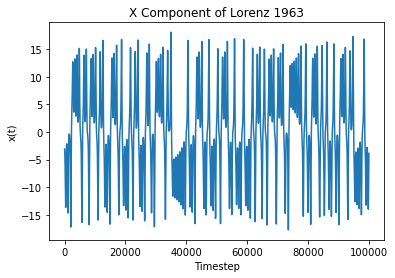

In [8]:
states = odeint(dfdt, state0, times_array)
print("dim(states): "+str(states.shape)) # dimension(states) = (time, space)
x_result = states[:,0]
y_result = states[:,1]
z_result = states[:,2]
plt.figure()
plt.plot(x_result)
plt.title("X Component of Lorenz 1963")
plt.xlabel("Timestep")
plt.ylabel("x(t)")
plt.show()

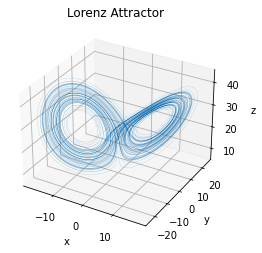

In [11]:
fig = plt.figure()
ax = fig.add_subplot(projection='3d')
ax.plot(x_result, y_result, z_result, linewidth=0.1)
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')
plt.title("Lorenz Attractor")
plt.show()